In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

#importo libreria panda per leggere ed elaborare csv
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)


train_data=pd.read_csv('/Users/tomma/Downloads/ProgettoMLDM-main (5)/train_data.csv')
test_data=pd.read_csv('/Users/tomma/Downloads/ProgettoMLDM-main (5)/test_data.csv')
y_train=pd.read_csv('/Users/tomma/Downloads/ProgettoMLDM-main (5)/train_y.csv')
y_test=pd.read_csv('/Users/tomma/Downloads/ProgettoMLDM-main (5)/test_y.csv')

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [14]:


#bagging con 1000 alberi di decisione
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20, random_state=10, min_samples_leaf=20, min_samples_split=6), n_estimators=1000,
    max_samples=30000, bootstrap=True, random_state=10, n_jobs=-1)
bag_clf.fit(train_data, np.ravel(y_train))
#y_pred = bag_clf.predict(test_data)
#print(accuracy_score(y_test, y_pred))


BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                   criterion='entropy',
                                                   max_depth=20,
                                                   min_samples_leaf=20,
                                                   min_samples_split=6,
                                                   random_state=10),
                  max_samples=30000, n_estimators=1000, n_jobs=-1,
                  random_state=10)

In [15]:
bag_clf.score(test_data,y_test)

0.868515700650159

In [7]:
tree_clf = DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20, random_state=10, min_samples_leaf=20, min_samples_split=6)
tree_clf.fit(train_data, np.ravel(y_train))

tree_clf.score(test_data, y_test)


0.8713860838290219

In [4]:
# Definisci l'estimatore DecisionTreeClassifier con i parametri di default
base_estimator = DecisionTreeClassifier(
    ccp_alpha=0.0001,
    criterion='entropy',
    max_depth=20,
    random_state=10,
    min_samples_leaf=20,
    min_samples_split=6
)

# Definisci il classificatore Bagging con DecisionTreeClassifier come base_estimator
bagging_classifier = BaggingClassifier(estimator=base_estimator)

# Definisci il dizionario dei parametri da cercare
parameters = {
    'n_estimators': [500, 1000, 1500, 2000, 2500],
    'max_samples': [30000],
    'bootstrap': [True],
    'random_state': [10],
}

# Creazione del dizionario di scoring
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Esecuzione della GridSearchCV
grid_search = GridSearchCV(
    estimator=bagging_classifier,
    param_grid=parameters,
    cv=2,  # Numero di fold per la cross-validation
    scoring=SCORING,  # Tipo di scoring
    n_jobs=6,  # Utilizza tutti i core della CPU
    refit="balanced_accuracy",
    verbose=4,
)

grid_search.fit(train_data, np.ravel(y_train))



Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=2,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                                          criterion='entropy',
                                                                          max_depth=20,
                                                                          min_samples_leaf=20,
                                                                          min_samples_split=6,
                                                                          random_state=10)),
             n_jobs=6,
             param_grid={'bootstrap': [True], 'max_samples': [30000],
                         'n_estimators': [500, 1000, 1500, 2000, 2500],
                         'random_state': [10]},
             refit='balanced_accuracy',
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=4)

In [21]:
# Visualizza i parametri migliori
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_dtc = grid_search.best_estimator_
best_dtc.score(test_data,y_test)

Best Parameters: {'bootstrap': True, 'max_samples': 20000, 'n_estimators': 1000, 'random_state': 10}
Best Score: 0.8709752723499914


0.8715244155484853

In [18]:
# Definisci l'estimatore DecisionTreeClassifier con i parametri di default
base_estimator = DecisionTreeClassifier(
    ccp_alpha=0.0001,
    criterion='entropy',
    max_depth=20,
    random_state=10,
    min_samples_leaf=20,
    min_samples_split=6
)

# Definisci il classificatore Bagging con DecisionTreeClassifier come base_estimator
bagging_classifier = BaggingClassifier()

# Definisci il dizionario dei parametri da cercare
parameters = {
    'n_estimators': [1000],
    'max_samples': [10000, 20000, 30000, 40000, 50000],
    'bootstrap': [True],
    'random_state': [10],
}

# Creazione del dizionario di scoring
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Esecuzione della GridSearchCV
grid_search = GridSearchCV(
    estimator=bagging_classifier,
    param_grid=parameters,
    cv=2,  # Numero di fold per la cross-validation
    scoring=SCORING,  # Tipo di scoring
    n_jobs=6,  # Utilizza tutti i core della CPU
    refit="accuracy",
)

grid_search.fit(train_data, np.ravel(y_train))

GridSearchCV(cv=2, estimator=BaggingClassifier(), n_jobs=6,
             param_grid={'bootstrap': [True],
                         'max_samples': [10000, 20000, 30000, 40000, 50000],
                         'n_estimators': [1000], 'random_state': [10]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'})

In [19]:
# Visualizza i parametri migliori
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.score(train_data,np.ravel(y_train)))
best_dtc = grid_search.best_estimator_
best_dtc.score(test_data,y_test)

Best Parameters: {'bootstrap': True, 'max_samples': 20000, 'n_estimators': 1000, 'random_state': 10}
Best Score: 0.8888120352758084


0.8715244155484853

In [22]:
#bagging con out-of-bag evaluation e parametri trovati con gridsearch
outbag_clf = BaggingClassifier(
    DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20, random_state=10, min_samples_leaf=4, min_samples_split=6), n_estimators=1000,
    max_samples=20000, bootstrap=True, oob_score=True, random_state=10, n_jobs=6)
outbag_clf.fit(train_data, np.ravel(y_train))
outbag_clf.oob_score_

0.8715113263012277

In [27]:
#Adaboost con 200 alberi di decisione di un solo livello
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20, random_state=10, 
                                                  min_samples_leaf=20, min_samples_split=6),
    n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(train_data, np.ravel(y_train))
y_pred = ada_clf.predict(test_data)
print(accuracy_score(y_test, y_pred))

0.8430972471987827


In [34]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
#adaboost con cross validation



abc = AdaBoostClassifier()


# Create the parameter grids
parameter_grid = {
     "n_estimators": [50, 100, 150, 200, 250],
     #"learning_rate": [.5, 1, 1.5],
     #"algorithm": ['SAMME', 'SAMME.R'],
    # 'random_state': [5, 10, 22, 50],
    "estimator": [DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20, random_state=10, 
                                                  min_samples_leaf=20, min_samples_split=6)]
}

# Create the scoring dictionary
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(
    estimator=abc,
    param_grid=parameter_grid,
    cv=2,
    verbose=3,
    scoring=SCORING,
    return_train_score=True,
    refit="balanced_accuracy",
   
)

grid_search.fit(train_data, np.ravel(y_train))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=10), n_estimators=50; accuracy: (train=1.000, test=0.836) balanced_accuracy: (train=1.000, test=0.736) f1: (train=1.000, test=0.757) total time=  18.3s
[CV 2/2] END estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=10), n_estimators=50; accuracy: (train=1.000, test=0.838) balanced_accuracy: (train=1.000, test=0.741) f1: (train=1.000, test=0.760) total time=  18.2s
[CV 1/2] END estimator=DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=10), n_estimators=100; accuracy: (tr

GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'estimator': [DecisionTreeClassifier(ccp_alpha=0.0001,
                                                              criterion='entropy',
                                                              max_depth=20,
                                                              min_samples_leaf=20,
                                                              min_samples_split=6,
                                                              random_state=10)],
                         'n_estimators': [50, 100, 150, 200, 250]},
             refit='balanced_accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=3)

In [35]:
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

best_abc = grid_search.best_estimator_
best_abc

Best score: 0.7445924749732513
Best parameters: {'estimator': DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=10), 'n_estimators': 250}


AdaBoostClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                    criterion='entropy',
                                                    max_depth=20,
                                                    min_samples_leaf=20,
                                                    min_samples_split=6,
                                                    random_state=10),
                   n_estimators=250)

In [37]:
my_model = best_abc
my_model.score(test_data, y_test)


0.8377023101397151

In [38]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
#adaboost con cross validation



abc = AdaBoostClassifier()


# Create the parameter grids
parameter_grid = {
     "n_estimators": [250],
     "learning_rate": [0.5, 1, 1.5, 2],
     "algorithm": ['SAMME', 'SAMME.R'],
    'random_state': [10],
    "estimator": [DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20, random_state=10, 
                                                  min_samples_leaf=20, min_samples_split=6)]
}

# Create the scoring dictionary
SCORING = {
    "accuracy": "accuracy",
    "balanced_accuracy": "balanced_accuracy",
    "f1": "f1_macro",
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(
    estimator=abc,
    param_grid=parameter_grid,
    cv=2,
    verbose=3,
    scoring=SCORING,
    return_train_score=True,
    refit="balanced_accuracy",
    n_jobs=6,  # Utilizza tutti i core della CPU

    
   
)

grid_search.fit(train_data, np.ravel(y_train))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=AdaBoostClassifier(), n_jobs=6,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [DecisionTreeClassifier(ccp_alpha=0.0001,
                                                              criterion='entropy',
                                                              max_depth=20,
                                                              min_samples_leaf=20,
                                                              min_samples_split=6,
                                                              random_state=10)],
                         'learning_rate': [0.5, 1, 1.5, 2],
                         'n_estimators': [250], 'random_state': [10]},
             refit='balanced_accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro'},
             verbose=3)

In [39]:
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

best_abc = grid_search.best_estimator_
best_abc

Best score: 0.7511816378079499
Best parameters: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=10), 'learning_rate': 0.5, 'n_estimators': 250, 'random_state': 10}


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                    criterion='entropy',
                                                    max_depth=20,
                                                    min_samples_leaf=20,
                                                    min_samples_split=6,
                                                    random_state=10),
                   learning_rate=0.5, n_estimators=250, random_state=10)

In [40]:
my_model = best_abc
my_model.score(test_data, y_test)


0.8663715589984784

In [30]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_stacking_and_plot(learners, i):
  meta_classifier = learners.pop(i)
  stacked_classifier = StackingClassifier(learners, final_estimator = meta_classifier[1])
  learners.insert(i, meta_classifier)
  stacked_classifier.fit(train_data, np.ravel(y_train))
  return stacked_classifier.score(test_data, y_test)


In [31]:
results = []
learners = [
    ('random forest', RandomForestClassifier(criterion='gini',max_depth=40, max_features=None, n_estimators=30, n_jobs=6, random_state=10)),
    ('decision tree', DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=20,
                       min_samples_leaf=20, min_samples_split=6,
                       random_state=10)),
    ('adaBoost', AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                    criterion='entropy',
                                                    max_depth=20,
                                                    min_samples_leaf=20,
                                                    min_samples_split=6,
                                                    random_state=10),
                   learning_rate=0.5, n_estimators=250, random_state=10)),
    ('bagging',BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0001,
                                                                          criterion='entropy',
                                                                          max_depth=20,
                                                                          min_samples_leaf=20,
                                                                          min_samples_split=6,
                                                                          random_state=10),
                    bootstrap=True, max_samples=20000, n_estimators=100, random_state=10)),
    ('extra trees', ExtraTreesClassifier(n_jobs=-1, n_estimators=100, criterion='gini', max_features= 'sqrt', random_state=10))
  ]
for i in range(len(learners)):
  test_score = perform_stacking_and_plot(learners, i)
  results.append([learners[i][0], test_score])

scores = pd.DataFrame(results, columns=['Model', 'Testset Score'])


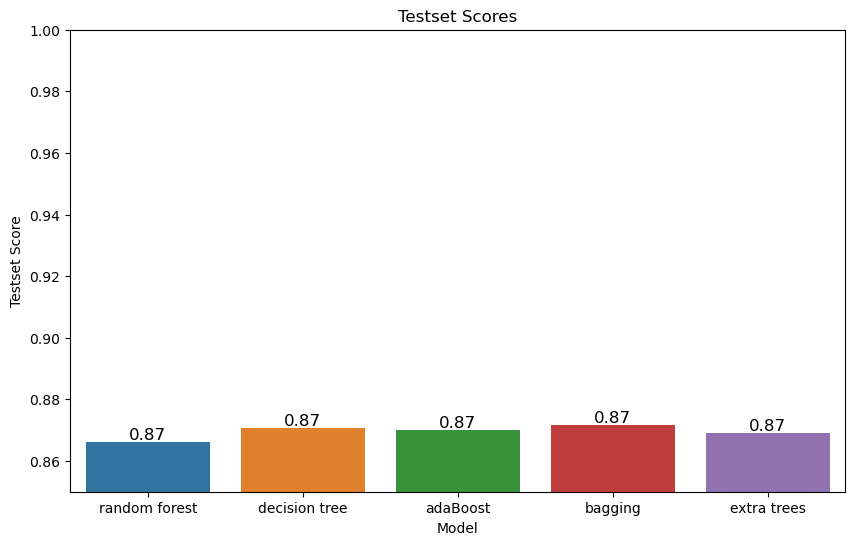

In [32]:
plt.figure(figsize=(10, 6))
plt.ylim([0.85, 1])
plt.title("Testset Scores")

sns.barplot(data=scores, x='Model', y='Testset Score', ax=plt.gca())
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.savefig("stacking_results.png", dpi=400, bbox_inches="tight")
plt.show()